<a href="https://colab.research.google.com/github/nhatruc3010/CMPE172/blob/class-activities/PLA_and_Pocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import pandas as pd

df = pd.read_csv('synthetic_dataset.csv')
data = df.to_numpy()

def get_sign(x, w):
  dotp = x[0]*w[0] + x[1]*w[1] + x[2]*w[2]
  return sign(dotp)

def sign(dotp):
  if dotp>=0:
    return 1
  else:
    return -1



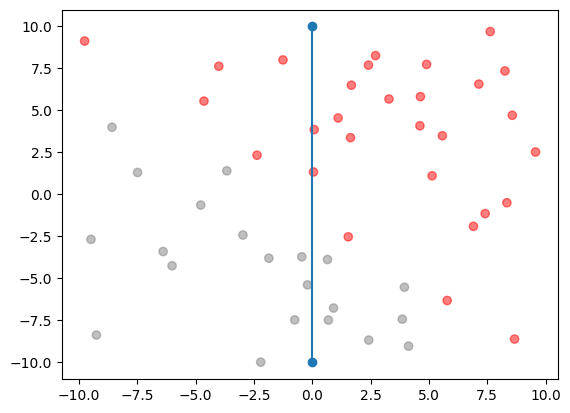

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
def get_y(x, w):
  # ax + by + c = 0
  # y = (-c -ax) / b
  y = (-w[2] - w[0]*x) / (w[1]+1e-6)
  return y

def get_x(y, w):
  # ax + by + c = 0
  # x = (-c -by ) /a
  x = (-w[2] - w[1]*y) / (w[0]+1e-6)
  return x

def get_two_sides(w, ranges=[-10, 10]):
  if w[0] < w[1]:
    x1, y1 = ranges, [get_y(ranges[0], w), get_y(ranges[1], w)]
  else:
    x1, y1 = [get_x(ranges[0], w), get_x(ranges[1], w)], ranges
  return x1, y1

def draw_figure(data, w, index_to_highlight):
  #All x = x1 , and y = y in data
  x = data[:,0]
  y = data[:,1]

  #Red color if y = 1, green for y = -1
  colors = [[1, 0, 0] if yy == 1 else [0, 1, 0] for idx, yy in enumerate(df['y'])]

  #Change color if misclassified data
  colors = [[0.5, 0.5, 0.5] if idx in index_to_highlight else yy for idx, yy in enumerate(colors) ]

  #Get the line
  x1, y1 = get_two_sides(w) #[-10, 10], [get_y(-10, w), get_y(10, w)]

  #Plot the data
  plt.plot(x1, y1, marker = 'o')
  plt.scatter(x, y, c=colors, alpha=0.5)
  plt.show()

def draw_misclassified(misclassified):
  epochs = np.arange(0, len(misclassified))
  plt.plot(epochs, misclassified)
  plt.xlabel('iterations')
  plt.ylabel('misclassified')
  plt.show()

#Initial w
w = [0, 0, 0]
signs = [ get_sign(point,w) for point in df.iloc ]
evaluation = data[:,-1] != signs
wrong_indices = np.where(evaluation)[0]
draw_figure(data, w, wrong_indices)

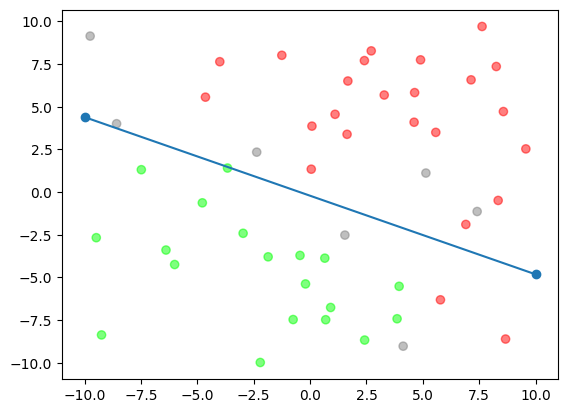

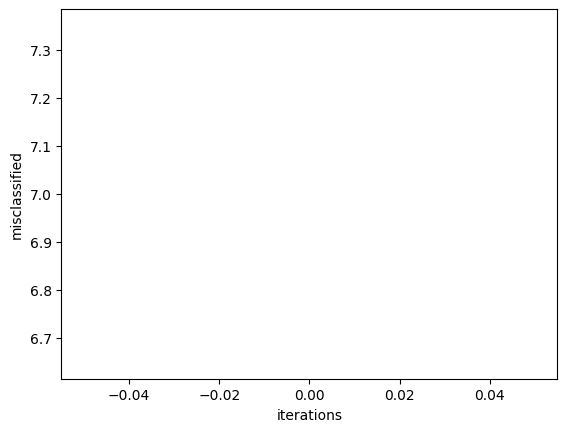

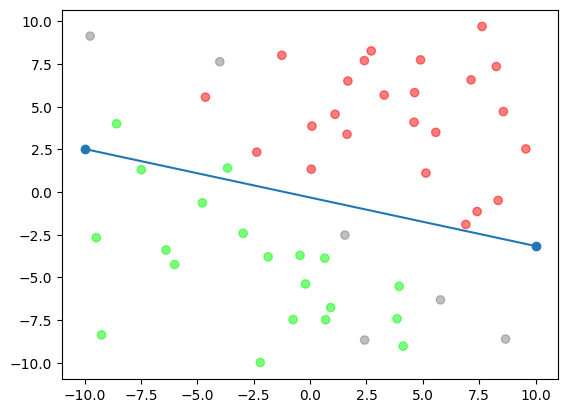

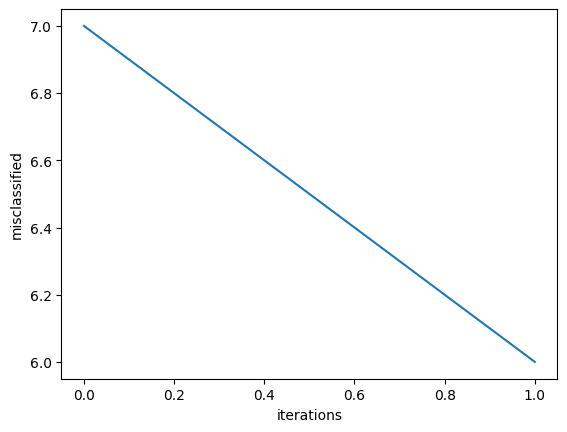

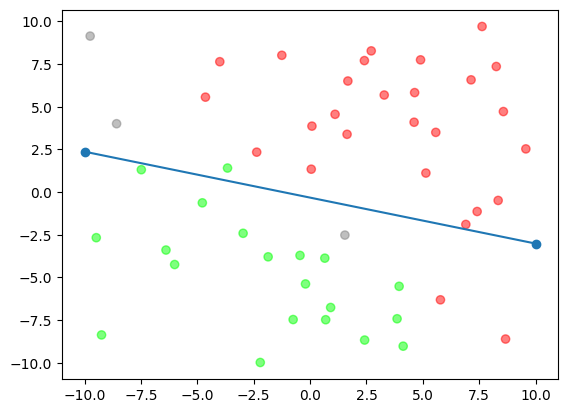

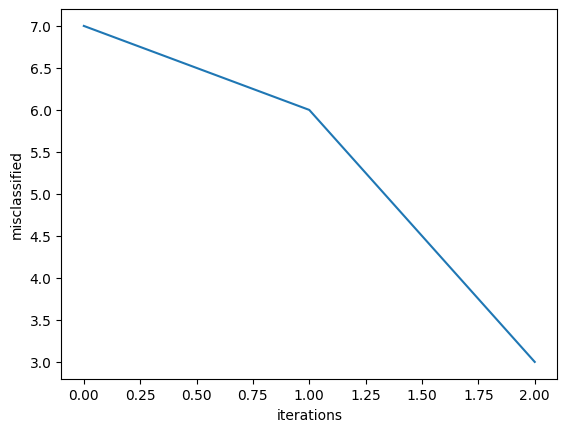

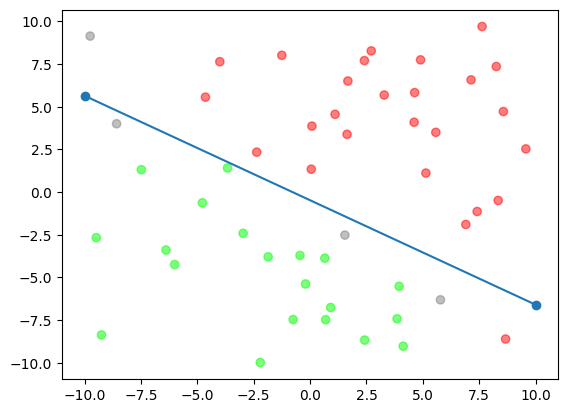

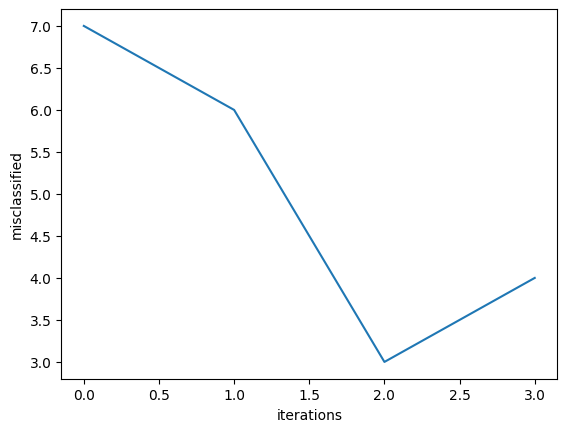

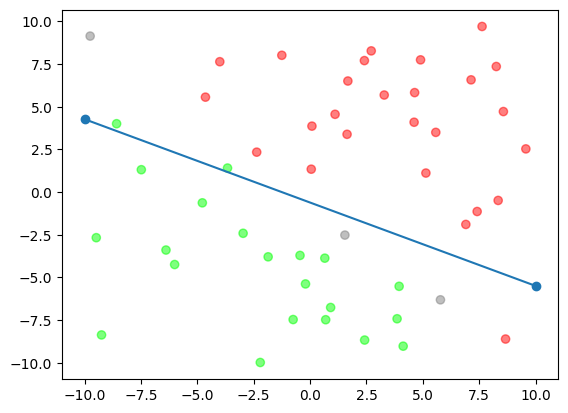

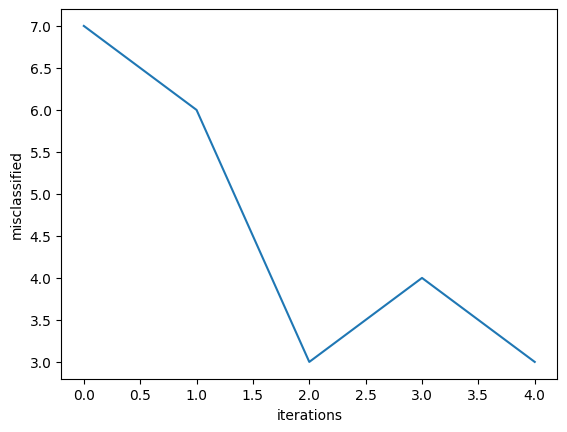

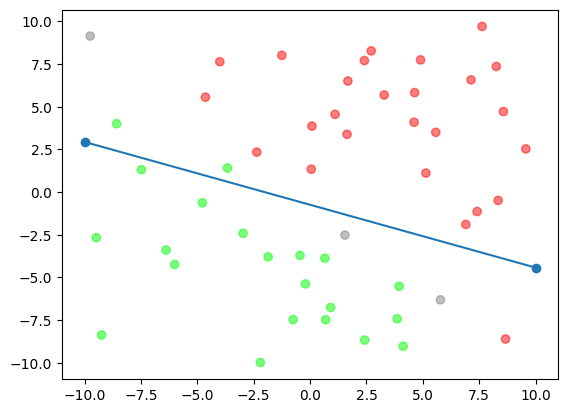

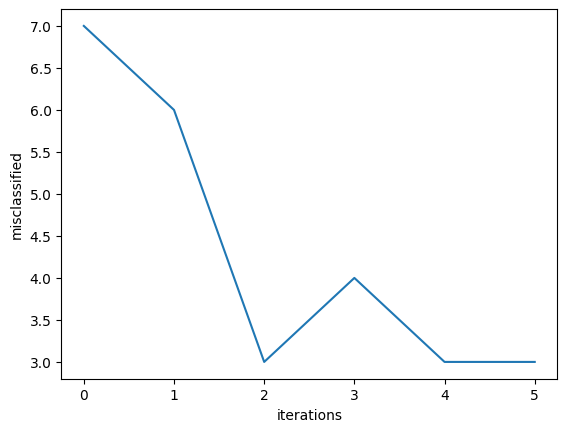

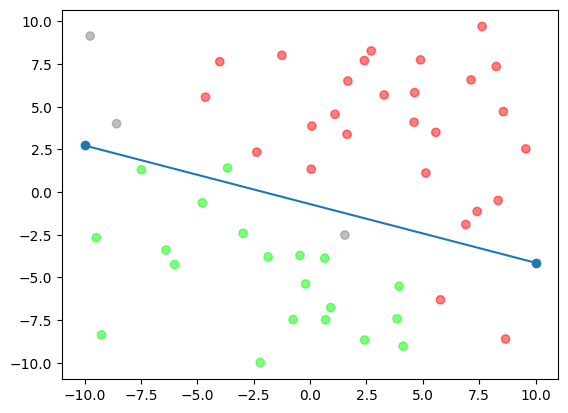

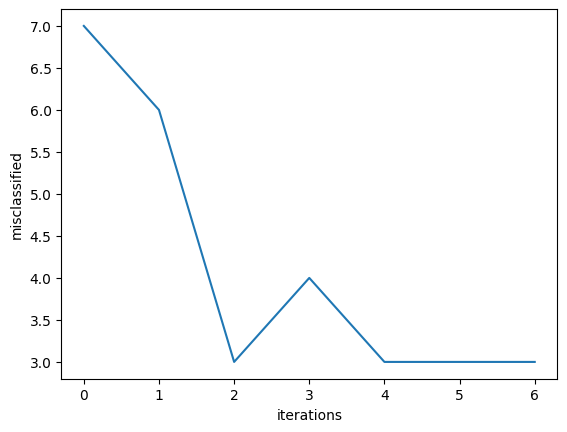

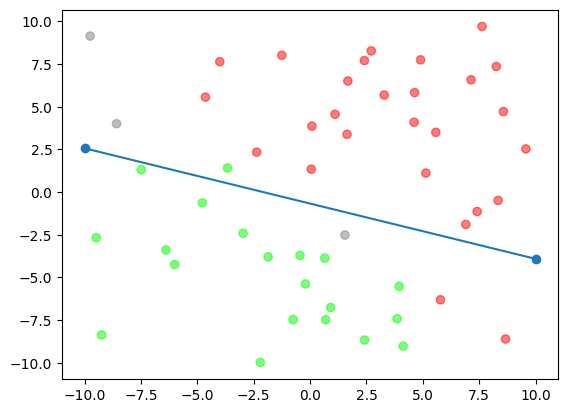

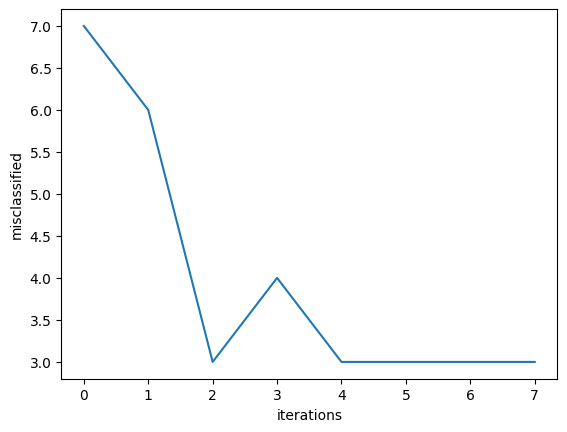

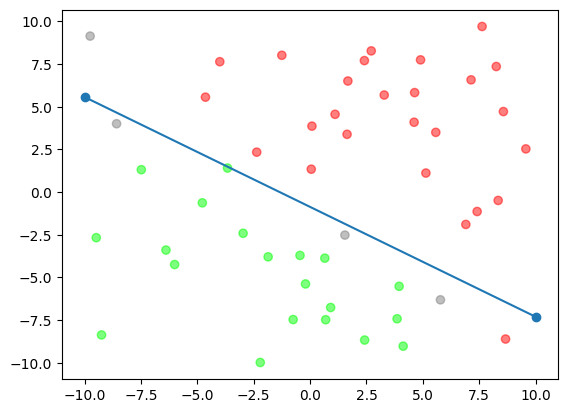

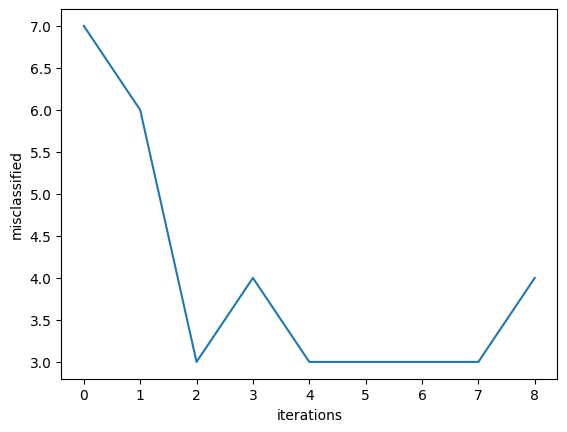

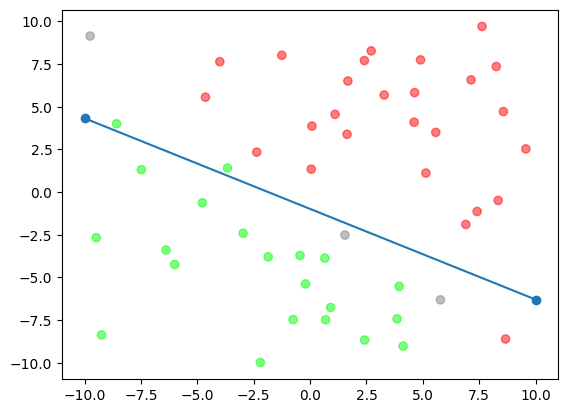

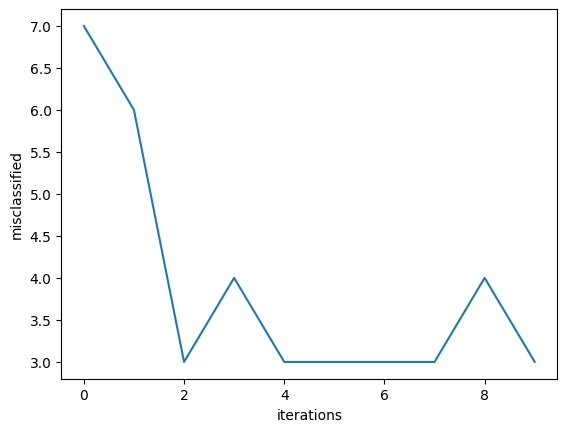

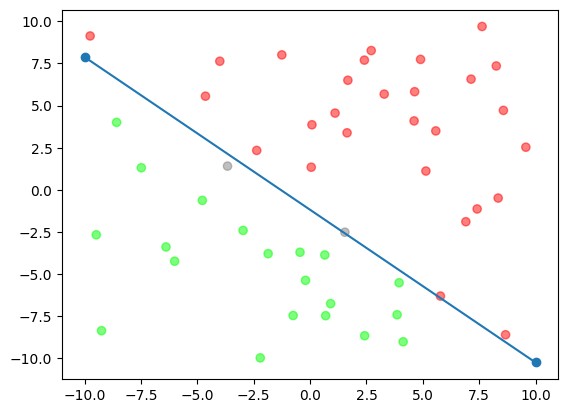

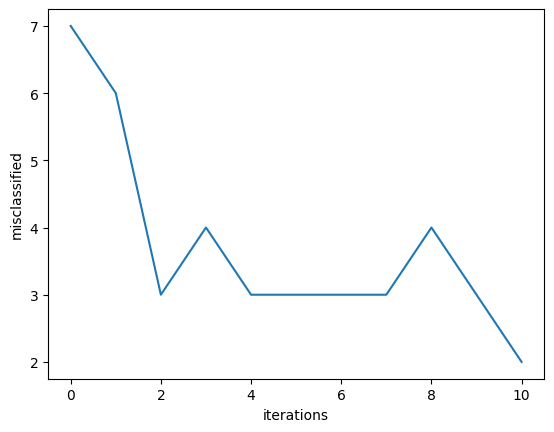

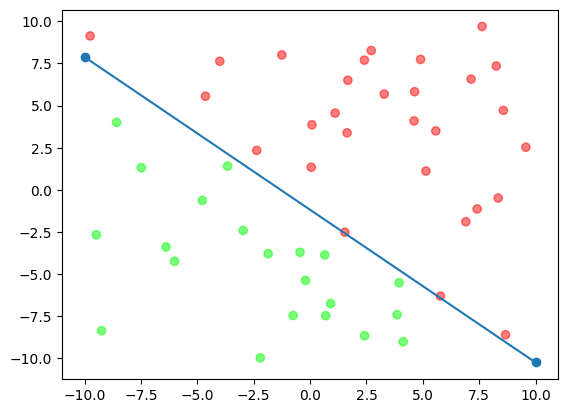

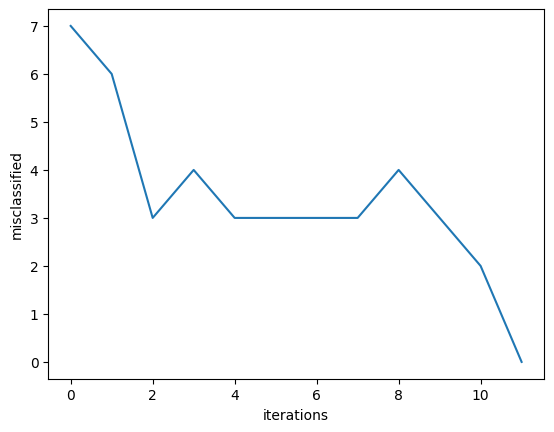

Current best at iteration 11: [17.56871845 19.37490927 23.        ]


In [3]:
import time

w = np.random.random(3)*0 #[0, 0, 0]

mis_classified_num = []
current_best_w = None
current_best_iteration = None
for i in range(30):
# while True:
  wrong_indices = []
  # Find any misclassified examples
  for idx, d in enumerate(data):
    x = np.array([d[0], d[1], 1])
    label = d[2]
    # y = np.dot(w, x.transpose())
    # target = 1.0 if (y > 0) else -1.0

    target = get_sign(x, w)

    compare_label = (label - target)
    #Update w = w(t) + yx
    if (compare_label):
      wrong_indices.append(idx)
      w = w + label * x

  #intial count of wrong indices
  mis_classified_num.append(len(wrong_indices))

  if np.min(mis_classified_num) == mis_classified_num[-1]:
    # Pocket Algorithm. Save w to somewhere.
    current_best_w = w.copy()
    current_best_iteration = i

  # Visualization
  if len(mis_classified_num) % 1 == 0 or len(wrong_indices) == 0:
    draw_figure(data, w, wrong_indices)
    draw_misclassified(mis_classified_num)
    time.sleep(1)

  # Stopping criteria
  if len(wrong_indices) == 0:
    print(f"Current best at iteration {current_best_iteration}: {current_best_w}")
    break

